In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [12]:
df = pd.read_csv("amazon_baby.csv")
df = df.dropna()
df.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


In [18]:
np.random.seed(30)
df1 = df.sample(frac = 0.3)

In [22]:
df1['sentiments'] = df1.rating.apply(lambda x: 0 if x in [1,2] else 1)

## Input Features
judge the comment using sentiments if the review is positive or negative

In [25]:
X = df1['review']
y = df1['sentiments']

## using Logestic regression model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Results for Logistic Regression with CountVectorizer
0.9021492799181227
2368 1629 1048 22313
0.9551 0.5924


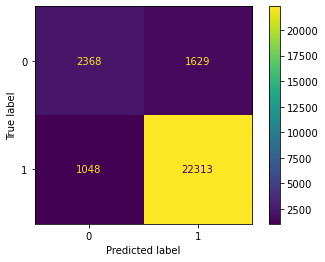

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=50)
cv = CountVectorizer()

#Vectorizing the text data
ctmTr = cv.fit_transform(X_train)
X_test_dtm = cv.transform(X_test)

#Training the model
lr = LogisticRegression()
lr.fit(ctmTr, y_train)

#Accuracy score
lr_score = lr.score(X_test_dtm, y_test)
print("Results for Logistic Regression with CountVectorizer")
print(lr_score)

#Predicting the labels for test data
y_pred_lr = lr.predict(X_test_dtm)
cm_lr = confusion_matrix(y_test, y_pred_lr)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr).ravel()
print(tn, fp, fn, tp)

#True positive and true negative rates
tpr_lr = round(tp/(tp + fn), 4)
tnr_lr = round(tn/(tn+fp), 4)
print(tpr_lr, tnr_lr)

#plot confusion metrix
plot_confusion_matrix(lr, X_test_dtm, y_test)  
plt.show()

# Support Vector Machine

Results for Support Vector Machine with CountVectorizer
0.888332480444477
1203 2857 198 23100
0.9915 0.2963


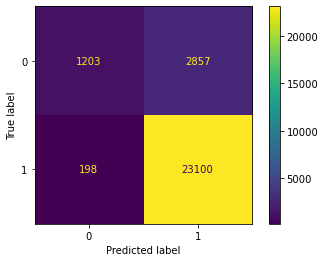

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)
cv = CountVectorizer()

#Vectorizing the text data
ctmTr = cv.fit_transform(X_train)
X_test_dtm = cv.transform(X_test)

# Support vector machine model
from sklearn.svm import SVC
svcl = SVC()
svcl.fit(ctmTr, y_train)

svcl_score = svcl.score(X_test_dtm, y_test)
print("Results for Support Vector Machine with CountVectorizer")
print(svcl_score)

y_pred_sv = svcl.predict(X_test_dtm)

#Confusion matrix
cm_sv = confusion_matrix(y_test, y_pred_sv)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_sv).ravel()
print(tn, fp, fn, tp)
tpr_sv = round(tp/(tp + fn), 4)
tnr_sv = round(tn/(tn+fp), 4)
print(tpr_sv, tnr_sv)
#plot confusion metrix
plot_confusion_matrix(svcl, X_test_dtm, y_test)  
plt.show()

# K Nearest Neighbor

Results for KNN Classifier with CountVectorizer
0.856422253088676
216 3706 222 23214
0.9905 0.0551


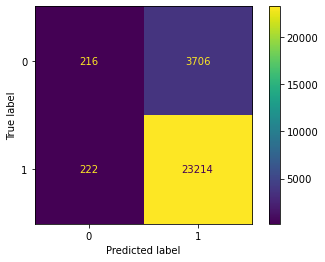

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=143)
cv = CountVectorizer()

ctmTr = cv.fit_transform(X_train)
X_test_dtm = cv.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(ctmTr, y_train)

knn_score = knn.score(X_test_dtm, y_test)
print("Results for KNN Classifier with CountVectorizer")
print(knn_score)
y_pred_knn = knn.predict(X_test_dtm)
#Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()
print(tn, fp, fn, tp)
tpr_knn = round(tp/(tp + fn), 4)
tnr_knn = round(tn/(tn+fp), 4)
print(tpr_knn, tnr_knn)
#plot confusion metrix
plot_confusion_matrix(knn, X_test_dtm, y_test)  
plt.show()

# Changing the Vectorizer Now using TFIDF Vectorizer
Please feel free [to check](https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a) this article to learn details about the TF-IDF vectorizer.

Results for Logistic Regression with tfidf
0.9037941369983186
1751 2200 432 22975
0.9815 0.4432


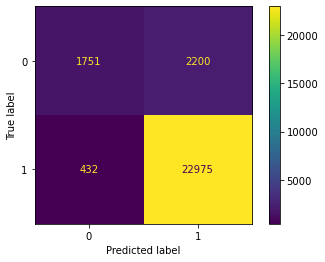

In [46]:
# Logestic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=45)

from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


lr = LogisticRegression()
lr.fit(X_train_vec, y_train)
lr_score = lr.score(X_test_vec, y_test)
print("Results for Logistic Regression with tfidf")
print(lr_score)
y_pred_lr = lr.predict(X_test_vec)

#Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_lr)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr).ravel()
print(tn, fp, fn, tp)
tpr_knn = round(tp/(tp + fn), 4)
tnr_knn = round(tn/(tn+fp), 4)
print(tpr_knn, tnr_knn)
plot_confusion_matrix(lr, X_test_vec, y_test)  
plt.show()

# Support Vector Machine

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=55)

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


#params = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100]}
svcl = SVC(kernel = 'rbf')
#clf_sv = GridSearchCV(svcl, params)
svcl.fit(X_train_vec, y_train)
svcl_score = svcl.score(X_test_vec, y_test)
print("Results for Support Vector Machine with tfidf")
print(svcl_score)
y_pred_sv = svcl.predict(X_test_vec)
#Confusion matrix

cm_sv = confusion_matrix(y_test, y_pred_sv)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_sv).ravel()
print(tn, fp, fn, tp)
tpr_sv = round(tp/(tp + fn), 4)
tnr_sv = round(tn/(tn+fp), 4)
print(tpr_sv, tnr_sv)

Results for Support Vector Machine with tfidf
0.9078514511294685
1787 2202 319 23050
0.9863 0.448


# K Nearest Neighbor

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=65)
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Traning Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_vec, y_train)
knn_score = knn.score(X_test_vec, y_test)
print("Results for KNN Classifier with tfidf")
print(knn_score)
y_pred_knn = knn.predict(X_test_vec)

#Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()
print(tn, fp, fn, tp)
tpr_knn = round(tp/(tp + fn), 4)
tnr_knn = round(tn/(tn+fp), 4)
print(tpr_knn, tnr_knn)

Results for KNN Classifier with tfidf
0.8598581767673076
159 3779 55 23365
0.9977 0.0404


# Result
Here are some key findings:
>> 1. Overall TF-IDF vectorizer gave us slightly better results than the count vectorizer part. For both the vectorizer.
>> 2. Logistic regression was the best out of all three classifiers used for this project considering overall accuracy, true  positive rate, and true negative rate.
>> 3. The KNN classifier does not seem to be suitable for this project. Though true positive rates look very good, true negative rates look really poor.

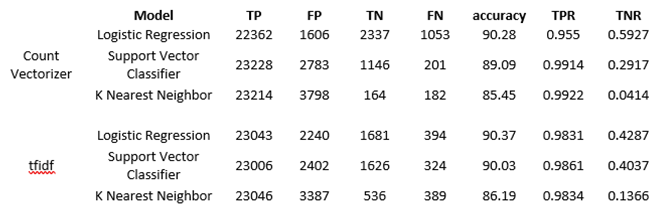